<a href="https://colab.research.google.com/github/modraqueeb/IndusVisionIntern/blob/main/Day2_MLintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GEOMETRIC TRANSFORMATIONS -
Geometric transformations in image processing include:

Shift: Moves the image by a specific number of pixels.

Scaling: Changes the size of the image by enlarging or reducing.

Rotation: Rotates the image around a point.

Shear: Distorts the image by slanting it along an axis.

Reflection: Flips the image over a specified axis.

Affine Transformation: Combines translation, scaling, rotation, and shearing, preserving parallelism.

Applications:

Image registration
Object recognition
Panorama stitching
Image augmentation
Georeferencing



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import pi


image = cv2.imread('/content/Chessboard.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[0], image.shape[1]

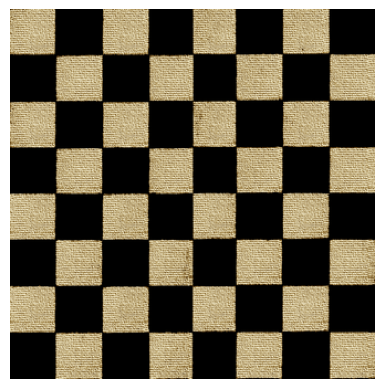

In [ ]:
# Define the transformation matrices

# No Change
# [[1,0,0],
#  [0,1,0],
#  [0,0,1]]

nochange_matrix = np.float32([[1, 0, 0],
                             [0, 1, 0]])

# Apply the transformations
nochange_image = cv2.warpAffine(image, nochange_matrix, (width, height))

plt.imshow(nochange_image)
plt.axis("off")
plt.show()

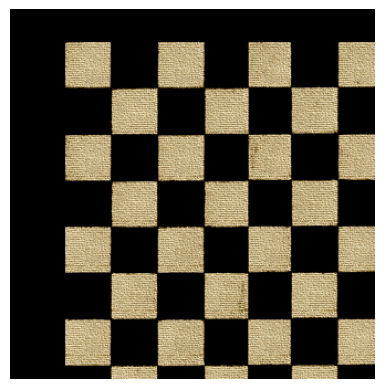

In [ ]:
# Shift matrix
# Translate Matrix

# [[1,0,X],
#  [0,1,Y],
#  [0,0,1]]

shift_matrix = np.float32([[1, 0, 50],  # shift right by 50 pixels
                           [0, 1, 30]]) # shift down by 30 pixels

shift_image = cv2.warpAffine(image, shift_matrix, (width, height))

plt.imshow(shift_image)
plt.axis("off")
plt.show()


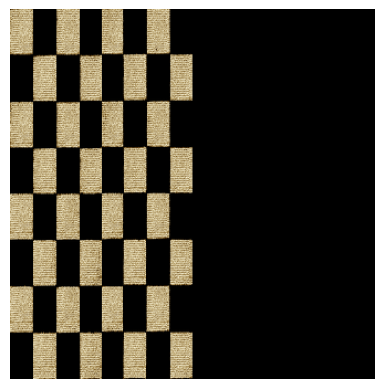

In [ ]:
# Scale about y axis

# Scale
# [[W,0,0],
#  [0,H,0],
#  [0,0,1]]

scale_matrix = np.float32([[0.5, 0, 0],   # scale horizontally by 0.5
                           [0, 1, 0]])  # scale vertically by 1

scale_image = cv2.warpAffine(image, scale_matrix, (width, height))

plt.imshow(scale_image)
plt.axis("off")
plt.show()


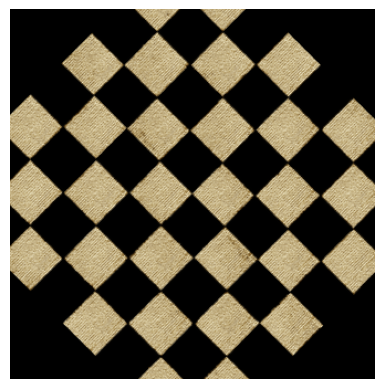

In [ ]:
# Rotate matrix

# [[cos(theta),-sin(theta), 0],
#  [sin(theta), cos(theta), 0],
#  [         0,          0, 1]]

rotate_matrix = cv2.getRotationMatrix2D(center=(width/2, height/2), angle=45, scale=1)

rotate_image = cv2.warpAffine(image, rotate_matrix, (width, height))

plt.imshow(rotate_image)
plt.axis("off")
plt.show()


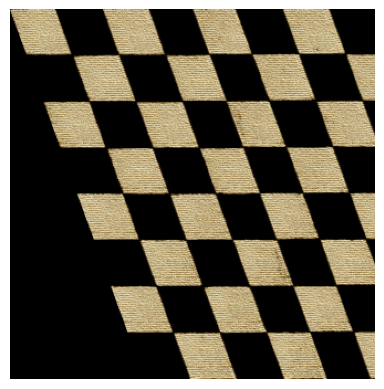

In [ ]:
# Shear in x-direction

# Shear matrix
angle = pi/9
shear_matrix = np.float32([[1, np.tan(angle), 0],
                           [0,            1, 0]])

sheared_imageX = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

plt.imshow(sheared_imageX)
plt.axis("off")
plt.show()


IMAGE THRESHOLDING -
Image Thresholding is a technique used to segment images into binary regions based on pixel values. Here are the main types:

Global Thresholding:

A single threshold value is applied across the entire image.
Example: Pixels above the threshold are set to white, below to black.
Limitation: Not effective for images with varying lighting.


Otsu's Thresholding:
Automatically calculates the optimal threshold by maximizing between-class variance.
Best suited for bimodal histograms (distinct light and dark regions).


Adaptive Mean Thresholding:
The threshold is calculated locally as the mean of pixel values in a small neighborhood around each pixel.
Effective for images with varying lighting conditions.


Adaptive Gaussian Thresholding:
Similar to adaptive mean, but the threshold is based on a weighted sum (Gaussian distribution) of pixel values in the neighborhood.
Provides better results in highly variable lighting conditions.

Applications:
Object detection, character recognition, medical imaging, and image segmentation.


(-0.5, 263.5, 190.5, -0.5)

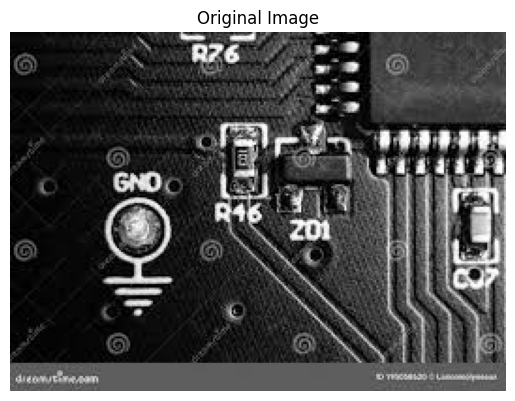

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/download.jpeg', cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.axis('off')

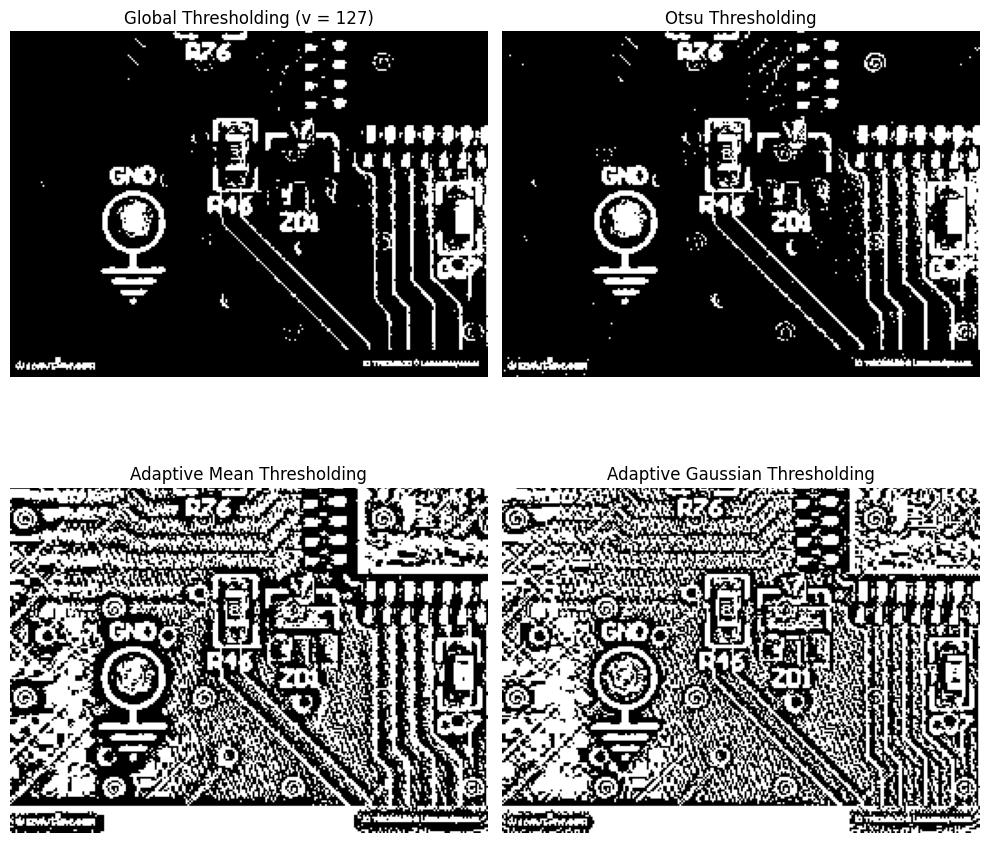

In [ ]:
ret, threshold1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, threshold2 = cv2.threshold(img,   0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
threshold3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
threshold4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

# Plotting images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(threshold1, cmap="gray")
plt.title('Global Thresholding (v = 127)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(threshold2, cmap="gray")
plt.title('Otsu Thresholding')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(threshold3, cmap="gray")
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(threshold4, cmap="gray")
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

MORPHOLOGICAL TRANSFORMATIONS -
Morphological Transformations are a set of operations in image processing that process images based on their structure or shape. These transformations are particularly useful for binary or grayscale images and focus on the shape and size of objects in the image.

Common Morphological Operations:
Erosion:

Description: Shrinks the boundaries of objects in a binary image. It removes pixels at the edges of the objects.
Effect: It erodes away the white region (foreground) and can separate objects that are close to each other.

Dilation:
Description: Expands the boundaries of objects in a binary image. It adds pixels to the edges of objects.
Effect: It enlarges the white region (foreground) and can connect nearby objects.

Opening:Description: A combination of erosion followed by dilation. It removes small objects and smooths the contours of larger objects.
Effect: It helps in removing noise or small artifacts from the image.

Closing:
Description: A combination of dilation followed by erosion. It fills small holes or gaps within objects.
Effect: It smooths the contour of the image and connects broken parts of an object.

Morphological Gradient:
Description: The difference between dilation and erosion of an image. It highlights the edges of objects.
Effect: Useful for edge detection.

Skeletonization:
Description: This operation reduces the foreground objects to their skeletal representation, preserving the topology and connectivity of the objects while removing unnecessary details.
Effect: It simplifies the object, making it easier to analyze its structure, such as in shape analysis or pattern recognition.

Applications:
Noise Removal: Removing small unwanted objects or filling holes in objects.
Shape Analysis: Extracting specific features based on shape.
Edge Detection: Highlighting boundaries or transitions between regions in an image.
Object Separation and Connection: Isolating objects or joining parts of an object.




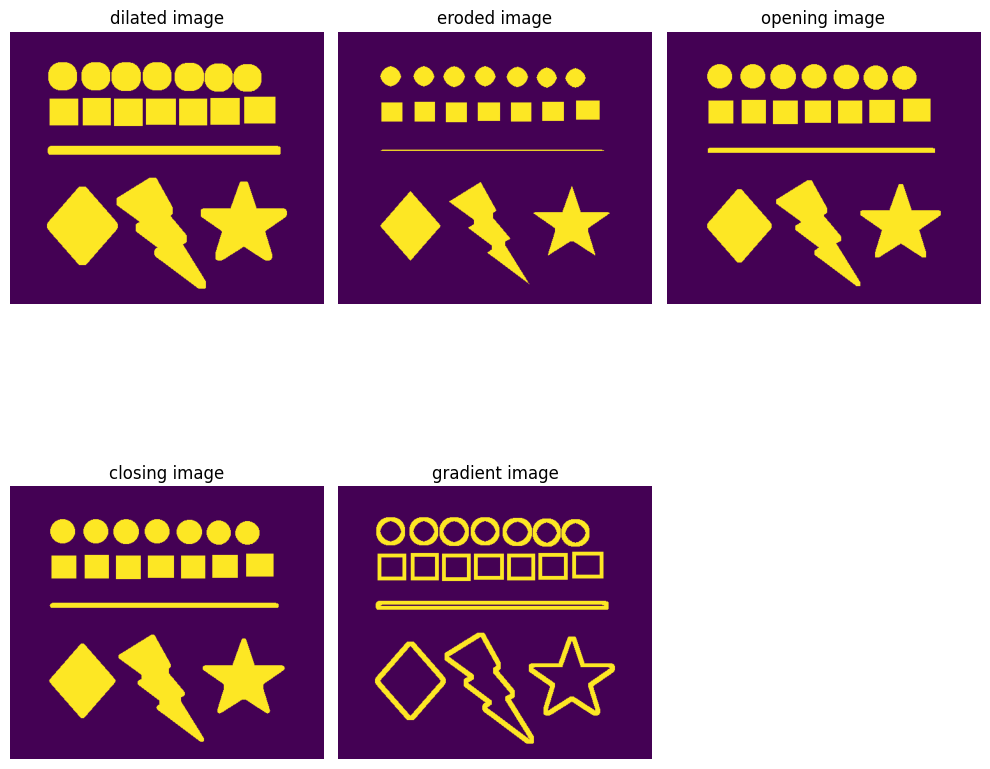

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/morph.png', cv2.IMREAD_GRAYSCALE)


kernel = np.ones((7,7), np.uint8)


dilatedImage = cv2.dilate(image, kernel, iterations=1)

erodedImage = cv2.erode(image, kernel, iterations=1)


closingImage = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


openingImage = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)





plt.figure(figsize=(10, 10))

plt.subplot(2, 3, 1)
plt.imshow(dilatedImage)
plt.title('dilated image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(erodedImage)
plt.title('eroded image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(openingImage)
plt.title('opening image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(closingImage)
plt.title('closing image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gradient)
plt.title('gradient image')
plt.axis('off')



plt.tight_layout()
plt.show()




**Image Smoothing**
Image smoothing refers to techniques used to reduce noise or detail in an image by averaging pixel values, making the image appear softer.

Types of Image Smoothing:

**Gaussian Blur:**
Description: Applies a Gaussian function to smooth the image, which reduces noise and details.
Application: Used for noise reduction, image preprocessing, and background blur in photography.

**Median Blur:**
Description: Replaces each pixel with the median value of its neighbors, useful for removing salt-and-pepper noise.
Application: Common in medical image processing and satellite imagery to clean noise.

**Mean (Box) Blur:**
Description: Averages the pixel values in a neighborhood (e.g., 3x3 or 5x5 kernel), producing a simple blur effect.
Application: Basic noise reduction and image smoothing.


**Applications of Image Smoothing:**
Noise Reduction: Removes unwanted pixels in an image caused by sensors or transmission issues.
Blurring Backgrounds: In photography or video processing, to emphasize the subject.
Preprocessing for Segmentation: Helps in improving the quality of subsequent edge detection or segmentation tasks in computer vision.
Medical Imaging: Used to clean up scans like CT/MRI images for better analysis.



**Image Sharpening**
Image sharpening enhances the details, edges, and high-frequency components of an image, making it crisper and more defined.

Types of Image Sharpening:

**Unsharp Masking:**
Description: Involves subtracting a blurred version of the image from the original, enhancing high-frequency details (edges).
Application: Commonly used in photo editing and print preparation.

**High-Pass Filter:**
Description: Retains high-frequency components (edges) by subtracting the low-frequency components (blurred image).
Application: Used for edge enhancement in image processing and computer vision.


**Laplacian Filter:**
Description: Detects edges by applying the second derivative of the image, emphasizing areas of rapid intensity change.
Application: Used in edge detection, feature extraction, and object recognition.

**Applications of Image Sharpening:**
Enhancing Image Clarity: Sharpening helps in improving fine details and the overall crispness of an image (used in photography, medical imaging).
Edge Detection: Used in object detection, recognition, and tracking systems.
Feature Extraction: In computer vision for detecting key points like corners, lines, and textures.
Medical Imaging: Sharpening MRI or CT scans to highlight fine details, making diagnosis easier.

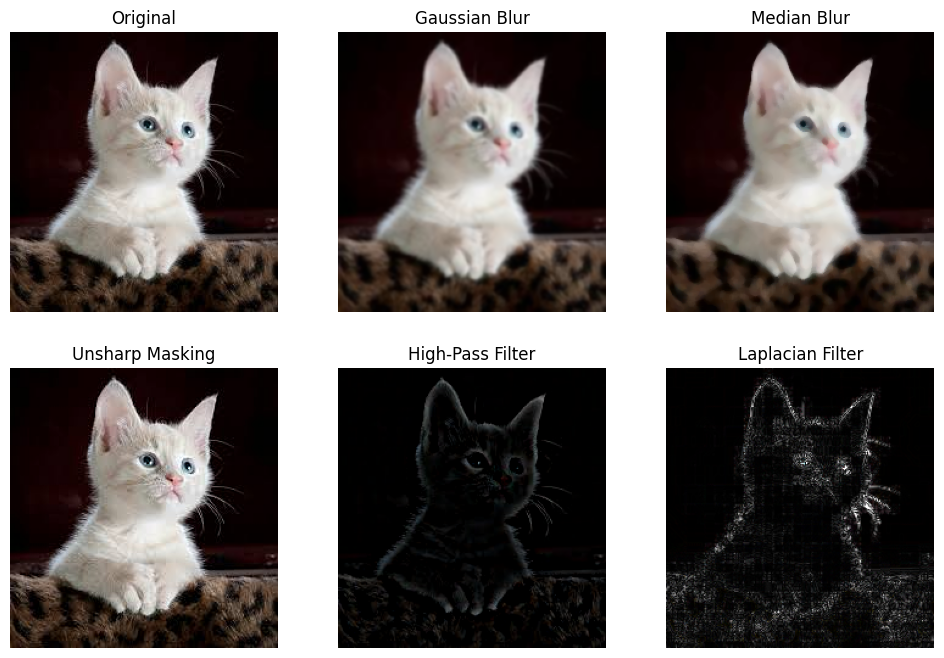

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a random dog image (ensure to replace this with the path to your dog image)
image = cv2.imread('/content/cat.jpeg')  # Replace 'cat.jpg' with your cat image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in Matplotlib




# Function to display the image
def show_images(images, titles):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()



# 1. **Smoothing Techniques**:

# a. **Gaussian Blur**
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# b. **Median Blur**
median_blur = cv2.medianBlur(image, 5)

# c. **Mean Blur** (Box Filter)
mean_blur = cv2.blur(image, (5, 5))  # Simple averaging filter





# 2. **Sharpening Techniques**:

# a. **Unsharp Masking** (Subtracting blurred image from original)
blurred_image = cv2.GaussianBlur(image, (5, 5), 1)
unsharp_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)



# b. **High-Pass Filter** (Subtracting low-pass filtered image from original)
low_pass = cv2.GaussianBlur(image, (15, 15), 10)
high_pass_image = cv2.subtract(image, low_pass)



# c. **Laplacian Filter** (Edge enhancement using Laplacian kernel)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)



# Combine all images into one list
images = [image, gaussian_blur, median_blur, unsharp_image, high_pass_image, laplacian_abs]
titles = ['Original', 'Gaussian Blur', 'Median Blur', 'Unsharp Masking', 'High-Pass Filter', 'Laplacian Filter']

# Display all images
show_images(images, titles)
